In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
style.use('fivethirtyeight')

In [85]:
vizag_data = pd.read_csv("C:/Users/sanjiv/Documents/Datasets/Misc/vizag_air_pollution.csv", parse_dates=True)

In [80]:
vizag_data.head()

,From Date,To Date,PM2.5,PM10,RH,Temp,NO,SO2,NO2,NOx,...,Benzene,Toluene,Xylene,WS,WD,AT,VWS,RF,BP,SR
0,01-05-2018 00:00,01-05-2018 01:00,9,39.25,78.75,29.6,2.17,1.47,7.95,6.02,...,1.2,2.9,0.78,3.88,None,31.9,0.05,0,743.25,6
1,01-05-2018 01:00,01-05-2018 02:00,6.75,39,79,29.32,1.97,1.5,6.58,5.1,...,0.97,2.22,0.58,3.87,355,31.8,0.03,0,743,6
2,01-05-2018 02:00,01-05-2018 03:00,8,37.75,79,29,1.92,0.95,5.45,4.48,...,0.8,1.6,0.38,4.5,338.25,31.4,-0.05,0,743,6
3,01-05-2018 03:00,01-05-2018 04:00,7.5,48,79,28.47,2.25,0.65,4.5,2.95,...,0.97,1.32,0.3,2.67,None,31.28,0,0,743.5,6
4,01-05-2018 04:00,01-05-2018 05:00,17,66,79,28.4,1.68,0.3,6.38,4.77,...,1,1.5,0.3,1.88,None,31.35,0.05,0,745,5.75


In [81]:
vizag_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17775 entries, 0 to 17774
Data columns (total 23 columns):
From Date    17775 non-null object
To Date      17775 non-null object
PM2.5        17775 non-null object
PM10         17775 non-null object
RH           17775 non-null object
Temp         17775 non-null object
NO           17775 non-null object
SO2          17775 non-null object
NO2          17775 non-null object
NOx          17775 non-null object
NH3          17775 non-null object
CO           17775 non-null object
Ozone        17775 non-null object
Benzene      17775 non-null object
Toluene      17775 non-null object
Xylene       17775 non-null object
WS           17775 non-null object
WD           17775 non-null object
AT           17775 non-null object
VWS          17775 non-null object
RF           17775 non-null object
BP           17775 non-null object
SR           17775 non-null object
dtypes: object(23)
memory usage: 3.1+ MB


In [86]:
vizag_data['From Date'] = pd.to_datetime(vizag_data['From Date'], format='%d-%m-%Y %H:%M')
vizag_data.sort_values('From Date', inplace = True)
vizag_data.drop(['To Date'], axis=1, inplace=True)
vizag_data.rename(columns={"From Date":"Date"}, inplace=True)
vizag_data.set_index('Date')

,PM2.5,PM10,RH,Temp,NO,SO2,NO2,NOx,NH3,CO,...,Benzene,Toluene,Xylene,WS,WD,AT,VWS,RF,BP,SR
Date,,,,,,,,,,,,,,,,,,,,,
2018-05-01 00:00:00,9,39.25,78.75,29.6,2.17,1.47,7.95,6.02,13.75,0.24,...,1.2,2.9,0.78,3.88,None,31.9,0.05,0,743.25,6
2018-05-01 01:00:00,6.75,39,79,29.32,1.97,1.5,6.58,5.1,13.1,0.23,...,0.97,2.22,0.58,3.87,355,31.8,0.03,0,743,6
2018-05-01 02:00:00,8,37.75,79,29,1.92,0.95,5.45,4.48,11.3,0.11,...,0.8,1.6,0.38,4.5,338.25,31.4,-0.05,0,743,6
2018-05-01 03:00:00,7.5,48,79,28.47,2.25,0.65,4.5,2.95,9.53,0.1,...,0.97,1.32,0.3,2.67,None,31.28,0,0,743.5,6
2018-05-01 04:00:00,17,66,79,28.4,1.68,0.3,6.38,4.77,6.8,0.12,...,1,1.5,0.3,1.88,None,31.35,0.05,0,745,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-10 10:00:00,19,85.75,68.75,33.05,0.98,4.9,18.98,10.88,9.28,0.11,...,5.4,11.73,5.15,2.75,150.25,32.38,-0.1,0,747,545.75
2020-05-10 11:00:00,9.5,67,69.5,31.9,0.6,None,13.9,7.9,9.7,0.11,...,1.92,4.38,1.43,3.23,146.75,32.02,-0.05,0,747,589.5
2020-05-10 12:00:00,8,31,66,29.85,0.9,7.7,10.95,6.55,8.6,0.11,...,0.95,3.05,0.85,3.23,155,33.38,-0.15,0,747,493.75


In [87]:
vizag_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            17765, 17766, 17767, 17768, 17769, 17770, 17771, 17772, 17773,
            17774],
           dtype='int64', length=17775)

In [88]:
vizag_data.replace(to_replace="None", value=np.nan, inplace=True)

In [89]:
vizag_data.isnull().sum()

Date          0
PM2.5      2799
PM10       2791
RH         2260
Temp       2262
NO         2259
SO2        3185
NO2        2254
NOx        2233
NH3        2740
CO         2286
Ozone      2376
Benzene    2281
Toluene    2281
Xylene     2281
WS         2260
WD         2347
AT         2260
VWS        2260
RF         2182
BP         4302
SR         2260
dtype: int64

In [90]:
for col in vizag_data.columns:
    if vizag_data[col].dtype == "object":
        vizag_data[col] = pd.to_numeric(vizag_data[col], errors='coerce')

In [91]:
vizag_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17775 entries, 0 to 17774
Data columns (total 22 columns):
Date       17775 non-null datetime64[ns]
PM2.5      14976 non-null float64
PM10       14984 non-null float64
RH         15515 non-null float64
Temp       15513 non-null float64
NO         15516 non-null float64
SO2        14590 non-null float64
NO2        15521 non-null float64
NOx        15542 non-null float64
NH3        15035 non-null float64
CO         15489 non-null float64
Ozone      15399 non-null float64
Benzene    15494 non-null float64
Toluene    15494 non-null float64
Xylene     15494 non-null float64
WS         15515 non-null float64
WD         15428 non-null float64
AT         15515 non-null float64
VWS        15515 non-null float64
RF         15593 non-null float64
BP         13473 non-null float64
SR         15515 non-null float64
dtypes: datetime64[ns](1), float64(21)
memory usage: 3.1 MB


In [127]:
vizag_data['PM2.5_cavg'] = vizag_data['PM2.5'].expanding(min_periods = 4).mean()
vizag_data['PM2.5_roll'] = vizag_data['PM2.5'].rolling(window = 24).mean()
vizag_data['PM2.5_ewa'] = vizag_data['PM2.5'].ewm(span=20, adjust=False).mean()


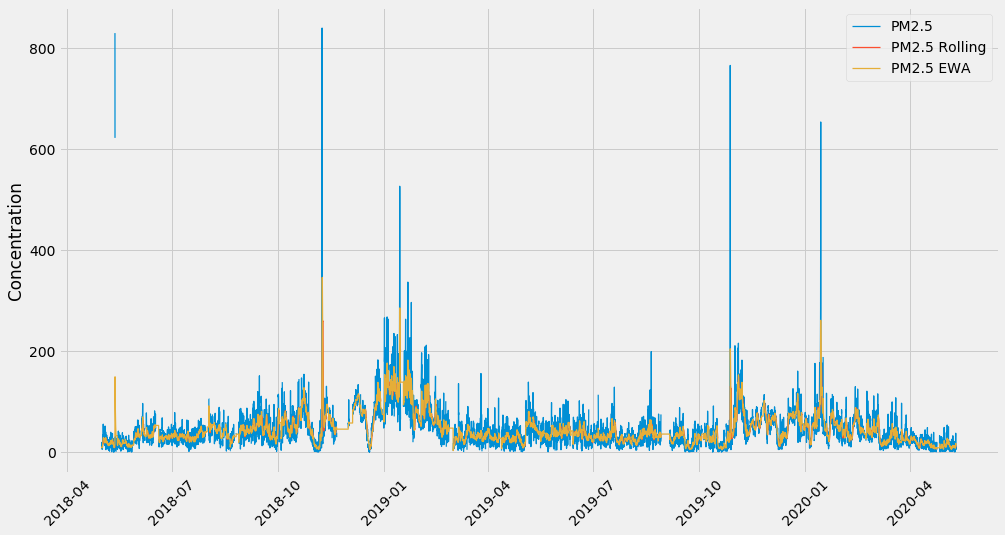

In [128]:
plt.figure(figsize=(15, 8))
plt.plot(vizag_data['Date'], vizag_data['PM2.5'], linewidth=1.25, label = 'PM2.5')
plt.plot(vizag_data['Date'], vizag_data['PM2.5_roll'], linewidth=1.25, label='PM2.5 Rolling')
plt.plot(vizag_data['Date'], vizag_data['PM2.5_ewa'], linewidth=1.25, label='PM2.5 EWA')
_ = plt.xticks(rotation = 45)
plt.legend(loc = 'best')
_=plt.ylabel('Concentration')

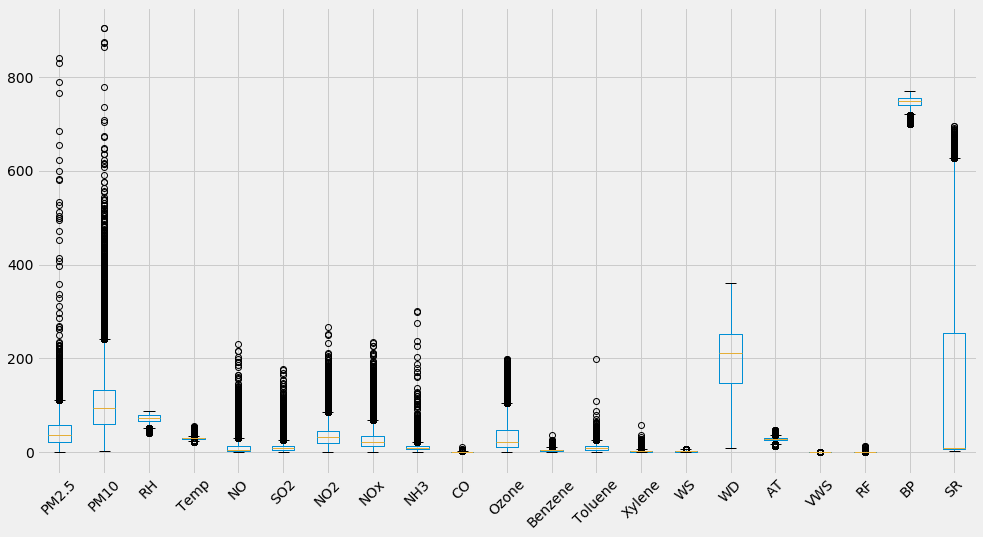

In [99]:
vizag_data.boxplot(figsize=(15,8), rot=45)

In [129]:
vizag_data.describe()

,PM2.5,PM10,RH,Temp,NO,SO2,NO2,NOx,NH3,CO,...,WS,WD,AT,VWS,RF,BP,SR,PM2.5_cavg,PM2.5_roll,PM2.5_ewa
count,14976.000000,14984.000000,15515.000000,15513.00000,15516.000000,14590.000000,15521.000000,15542.000000,15035.000000,15489.000000,...,15515.000000,15428.000000,15515.000000,15515.000000,15593.000000,13473.000000,15515.000000,17772.000000,10803.000000,17775.000000
mean,45.284272,107.374016,72.513680,29.67580,11.794310,11.033303,36.192046,28.751200,10.779942,0.766319,...,2.339542,200.885824,27.433210,0.027187,0.021792,747.320660,138.638946,43.737697,48.017165,44.779277
std,38.715413,72.479195,7.620538,3.19499,16.989571,11.848751,24.515855,23.949013,9.376370,0.474027,...,1.183894,67.659067,4.094099,0.066446,0.293172,11.111556,188.274096,9.091142,30.947939,29.073494
min,0.250000,3.000000,41.000000,21.33000,0.100000,0.100000,0.100000,0.000000,0.100000,0.000000,...,0.300000,9.000000,12.900000,-0.300000,0.000000,700.000000,3.000000,7.812500,5.281250,3.327316
25%,22.250000,61.000000,67.500000,28.08000,2.970000,4.450000,19.000000,13.150000,6.880000,0.470000,...,1.420000,148.500000,24.920000,0.000000,0.000000,741.000000,7.000000,39.882238,28.072917,26.667219
50%,36.500000,93.500000,73.500000,29.45000,5.330000,7.970000,31.350000,22.540000,9.530000,0.710000,...,2.280000,210.500000,27.500000,0.000000,0.000000,748.500000,9.250000,46.947216,39.208333,36.763830
75%,58.000000,132.812500,78.250000,30.93000,13.580000,13.350000,45.780000,35.450000,12.600000,0.980000,...,3.170000,252.750000,29.950000,0.050000,0.000000,755.000000,255.125000,49.092910,58.796875,54.141583
max,840.000000,904.000000,88.500000,55.40000,230.500000,178.400000,266.730000,235.500000,301.100000,10.010000,...,7.830000,360.000000,47.770000,0.400000,12.500000,770.000000,696.500000,56.466879,260.281250,346.229555


In [145]:
sns.set(style="ticks")

def combo_plot(df, col):
    
    x = df[col].dropna()
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                        gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(x, ax=ax_box)
    sns.distplot(x, ax=ax_hist)

    ax_box.set(yticks=[], xlabel="")
    ax_hist.set(xlabel = col+"")
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

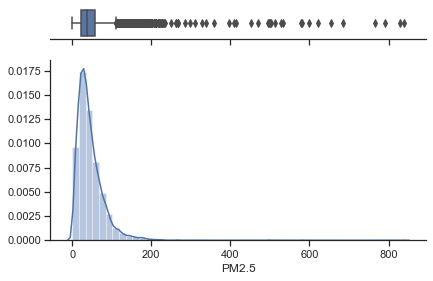

In [146]:
combo_plot(vizag_data, 'PM2.5')

In [149]:

def get_averages(df):
    df["PM10_24hr_avg"] = df["PM10"].rolling(window = 24, min_periods = 16).mean().values
    df["PM2.5_24hr_avg"] = df["PM2.5"].rolling(window = 24, min_periods = 16).mean().values
    df["SO2_24hr_avg"] = df["SO2"].rolling(window = 24, min_periods = 16).mean().values
    df["NOx_24hr_avg"] = df["NOx"].rolling(window = 24, min_periods = 16).mean().values
    df["NH3_24hr_avg"] = df["NH3"].rolling(window = 24, min_periods = 16).mean().values
    df["CO_8hr_max"] = df["CO"].rolling(window = 8, min_periods = 1).max().values
    df["Ozone_8hr_max"] = df["Ozone"].rolling(window = 8, min_periods = 1).max().values
    
    return df

In [150]:
vizag_data_avg = get_averages(vizag_data)

In [151]:
vizag_data_avg.head()

,Date,PM2.5,PM10,RH,Temp,NO,SO2,NO2,NOx,NH3,...,PM2.5_cavg,PM2.5_roll,PM2.5_ewa,PM10_24hr_avg,PM2.5_24hr_avg,SO2_24hr_avg,NOx_24hr_avg,NH3_24hr_avg,CO_8hr_max,Ozone_8hr_max
0,2018-05-01 00:00:00,9.00,39.25,78.75,29.60,2.17,1.47,7.95,6.02,13.75,...,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.24,27.22
1,2018-05-01 01:00:00,6.75,39.00,79.00,29.32,1.97,1.50,6.58,5.10,13.10,...,NaN,NaN,8.785714,NaN,NaN,NaN,NaN,NaN,0.24,29.72
2,2018-05-01 02:00:00,8.00,37.75,79.00,29.00,1.92,0.95,5.45,4.48,11.30,...,NaN,NaN,8.710884,NaN,NaN,NaN,NaN,NaN,0.24,35.50
3,2018-05-01 03:00:00,7.50,48.00,79.00,28.47,2.25,0.65,4.50,2.95,9.53,...,7.8125,NaN,8.595562,NaN,NaN,NaN,NaN,NaN,0.24,40.80
4,2018-05-01 04:00:00,17.00,66.00,79.00,28.40,1.68,0.30,6.38,4.77,6.80,...,9.6500,NaN,9.395985,NaN,NaN,NaN,NaN,NaN,0.24,40.80
